# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [1]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


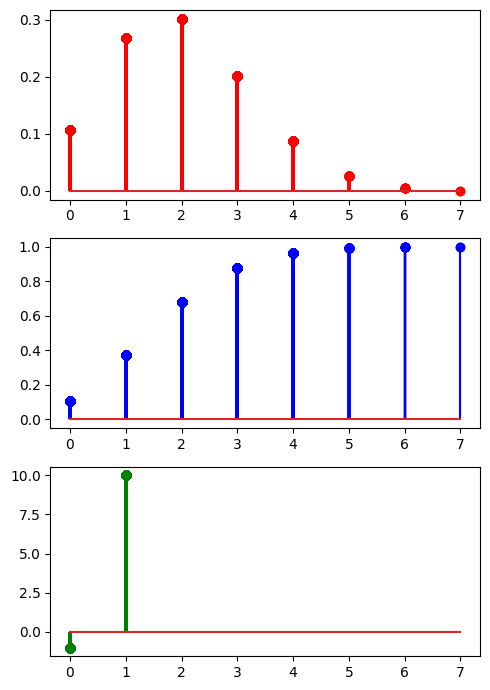

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [4]:
from scipy.stats import norm

def dnorm(x, mean, sd ):

    result = norm.pdf(x, mean, sd)
    return result

def cnorm(x, mean, sd):

    result = norm.cdf(x, mean, sd)
    return result

def qnorm(p, mean, sd):
   
    result = norm.ppf(p, mean, sd)
    return result

def rnorm(n, mean, sd):
   
    result = norm.rvs(mean, sd, size=n)

    return result

 #Distribución Normal
#Función de densidad (dnorm): para calcular la densidad de probabilidad.
#Función acumulativa (cnorm): para calcular la probabilidad acumulativa.
#Función cuantil (qnorm): para obtener el cuantil correspondiente a una probabilidad dada.
#Función de generación de números aleatorios (rnorm): para generar números aleatorios.


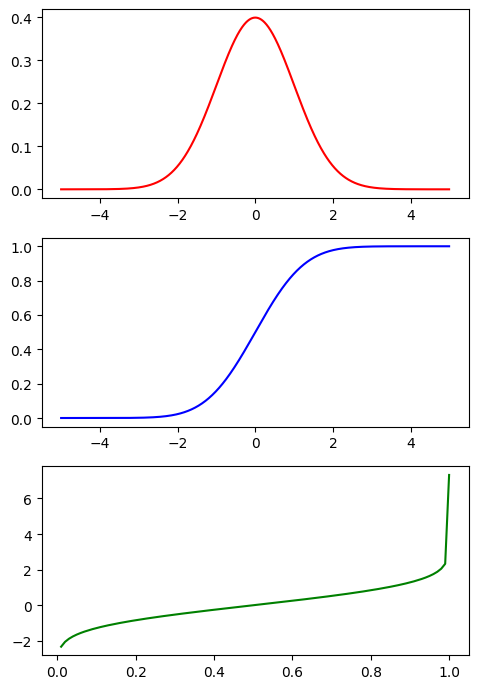

In [5]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
mean = 0
sd = 1
data = np.arange(-5, 5, 0.01)


pmf = dnorm(data, mean, sd) 
cdf = cnorm(data, mean, sd) 
ppf = norm.ppf(data, mean, sd)
p = np.linspace(0.01, 0.99, 100)

fig, axes = plt.subplots(3, 1, figsize=(5, 7))

axes[0].plot(data, pmf, 'r-', label='PDF')
axes[1].plot(data, cdf, 'b-', label='CDF')
axes[2].plot(data, ppf, 'g-', label='PPF')

plt.tight_layout()
plt.show()

In [7]:
# Distribución Uniforme 

from scipy.stats import uniform

def dunif(x, a, b):
  
    result = uniform.pdf(x, a, scale=b-a)
    return result

def cunif(q, a, b):

    result = uniform.cdf(q, loc=a, scale=b-a)
    return result

def qunif(p, a, b):

    result = uniform.ppf(p, loc=a, scale=b-a)
    return result

def runif(n, a, b):

    result = uniform.rvs(loc=a, scale=b-a, size=n)
    return result

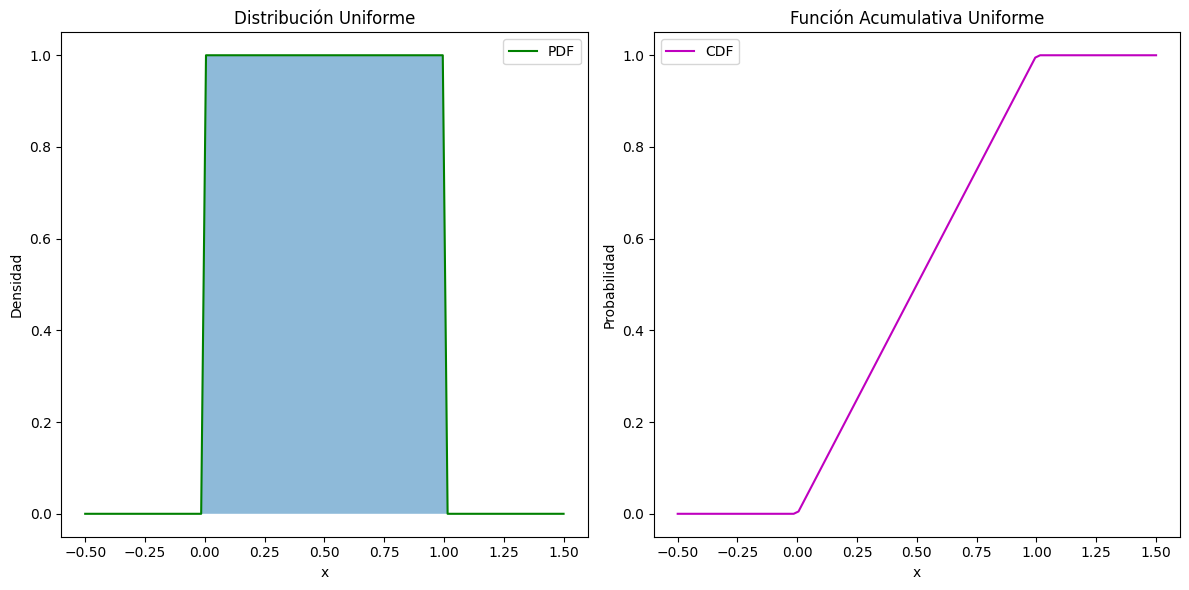

In [8]:
a = 0
b = 1

# Generar datos
x_uniform = np.linspace(a - 0.5, b + 0.5, 100)
pdf_uniform = dunif(x_uniform, a, b) 
cdf_uniform = cunif(x_uniform, a, b)  


# Graficar
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
plt.plot(x_uniform, pdf_uniform, 'g-', label='PDF')
plt.fill_between(x_uniform, pdf_uniform, alpha=0.5)
plt.title('Distribución Uniforme')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()

plt.subplot(1, 2, 2)  
plt.plot(x_uniform, cdf_uniform, 'm-', label='CDF')
plt.title('Función Acumulativa Uniforme')
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.legend()

plt.tight_layout()
plt.show()